In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from math import exp,pi,pow,sqrt
import cv2

In [2]:
#EXercice 1:
def LG(i, j, sigma):
    r = sqrt(pow(i,2)+pow(j,2))
    a = pow(r,2) / (2 * sigma ** 2)
    b = 1 / (pi * pow(sigma,4))
    c = 1 - a
    LG= b*c * exp(-a)
    return LG

In [3]:
print(LG(1,2,0.625))

-0.018717124690994517


In [4]:
def masque(sigma):
    sigma=0.625
    list=[]
    for i in range(-2,3):
        ligne=[]
        for j in range(-2,3):
            ligne.append(LG(i,j,sigma))
        list.append(ligne)
    return np.asarray(list)
      

In [5]:
mask=masque(0.625)
print(mask)

[[-6.88377290e-04 -1.87171247e-02 -5.13617162e-02 -1.87171247e-02
  -6.88377290e-04]
 [-1.87171247e-02 -2.51571120e-01 -1.62401917e-01 -2.51571120e-01
  -1.87171247e-02]
 [-5.13617162e-02 -1.62401917e-01  2.08607567e+00 -1.62401917e-01
  -5.13617162e-02]
 [-1.87171247e-02 -2.51571120e-01 -1.62401917e-01 -2.51571120e-01
  -1.87171247e-02]
 [-6.88377290e-04 -1.87171247e-02 -5.13617162e-02 -1.87171247e-02
  -6.88377290e-04]]


In [6]:
def convolution(img,sigma = 0.625):
    masquee = masque(sigma)
    ligne,colonne = img.shape
    pro = np.zeros((ligne,colonne), int)
    for i in range(2,ligne-2):
        for j in range(2,colonne-2):
            for x in range(-2, 3):
                for y in range(-2, 3):
                    pro[i][j] += masquee[x + 2, y + 2] * img[i + x, j + y]
            
    return pro
    

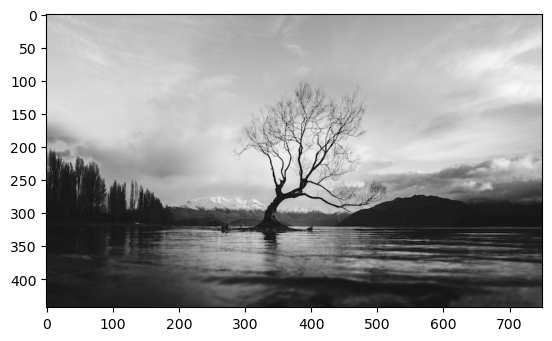

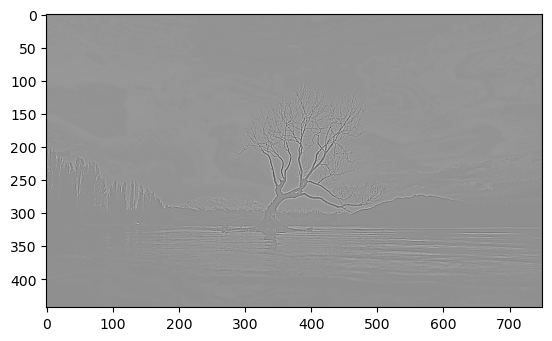

In [7]:
img=cv2.imread("photo.png",0)
plt.imshow(img,cmap='gray')
plt.show()
IMG_CON=convolution(img, 0.625)
plt.imshow(IMG_CON,cmap='gray')
plt.show()

In [8]:
def localisation_zero(image, sigma = 0.625):
    ligne, colonne = image.shape
    image_final = np.zeros((ligne,colonne), int)
    for i in range(2, ligne - 2):
        for j in range(2, colonne - 2):
            image_final[i][j] = image[i][j]
            if (image[i][j] * image[i][j+1] < 0): 
                image_final[i][j] = 0
            elif (image[i][j] * image[i+1][j] < 0):
                image_final[i][j] = 0
    return image_final

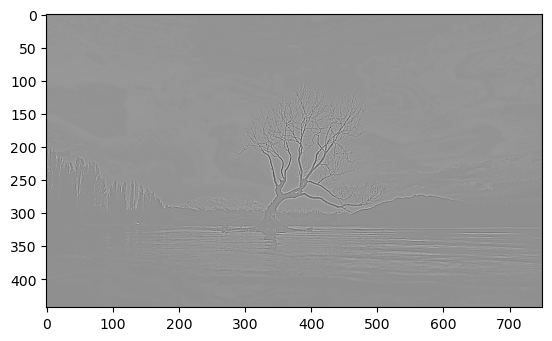

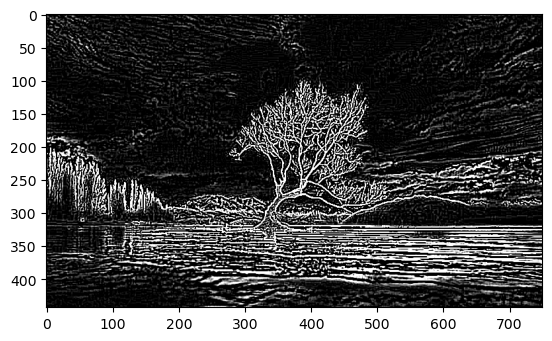

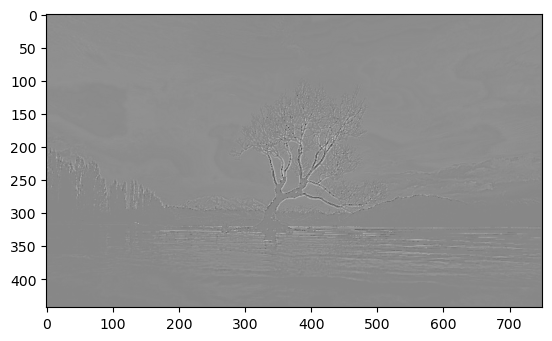

In [10]:
img=cv2.imread("photo.png",0)
IMG_convolution =convolution(img,0.625)
plt.imshow(IMG_convolution,cmap="gray")
plt.show()
IMG_fct=cv2.Laplacian(img, cv2.CV_8U,ksize=5)
plt.imshow(IMG_fct,cmap="gray") 
plt.show()
IMGP0=localisation_zero(IMG_convolution, 0.625)
plt.imshow(IMGP0,cmap="gray")
plt.show()

In [7]:
import matplotlib.pyplot as plt 
import numpy as np 
from math import exp,pi,pow,sqrt
import cv2

In [12]:
#EXercice 2:
def gauss(x,y,sigma=0.625):
    r = pow(x,2) + pow(y,2)
    Ep=(r/(2*pow(sigma,2)))
    L=(2*pi*pow(sigma,2))
    Gauss=(1/L)*np.exp(-Ep)
    return Gauss

In [13]:
print(gauss(1,1,0.625))

0.031496784808927


In [14]:
def masque_gauss(sigma=0.625):
    list=[]
    for i in range(-2,3):
        ligne=[]
        for j in range(-2,3):
            ligne.append(gauss(i,j,sigma))
        list.append(ligne)
    return np.asarray(list)

In [15]:
mask=masque_gauss()
print(mask)

[[1.45507240e-05 6.76979336e-04 2.43485077e-03 6.76979336e-04
  1.45507240e-05]
 [6.76979336e-04 3.14967848e-02 1.13282587e-01 3.14967848e-02
  6.76979336e-04]
 [2.43485077e-03 1.13282587e-01 4.07436654e-01 1.13282587e-01
  2.43485077e-03]
 [6.76979336e-04 3.14967848e-02 1.13282587e-01 3.14967848e-02
  6.76979336e-04]
 [1.45507240e-05 6.76979336e-04 2.43485077e-03 6.76979336e-04
  1.45507240e-05]]


In [16]:
def convolution_gauss(image, Masque):
    Masque=masque_gauss(0.625)
    L,C = image.shape
    convolution_image=np.zeros((L,C),int)
    for i in range(2,L-2):
        for j in range(2,C-2):
            for n in range(-2,3):
                for m in range(-2,3):
                    convolution_image[i][j]+=Masque[n+2][m+2]*image[i+n][j+m]
    return  convolution_image     


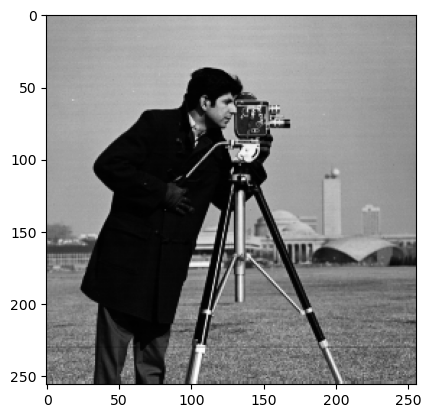

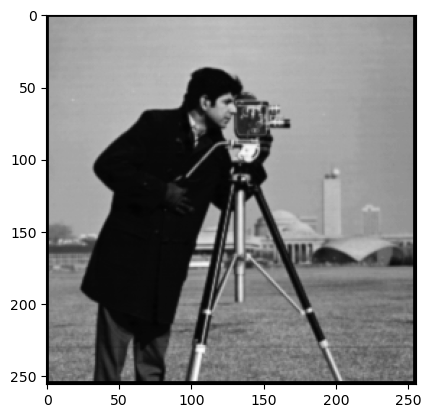

In [17]:
img=cv2.imread("caman.tif",0)
plt.imshow(img,cmap='gray')
plt.show()
IMG_CON=convolution_gauss(img,mask)
plt.imshow(IMG_CON,cmap='gray')
plt.show()

In [18]:
def deriveeH(img):
    L,C= img.shape
    d_x=np.zeros((L,C),int)
    M = [-1,0,1]
    for i in range(1,L-1):
        for j in range(1,C-1):
             for n in range(-1,2):
                d_x[i][j]+=(img[i][j+n]*M[n+1])
    return d_x

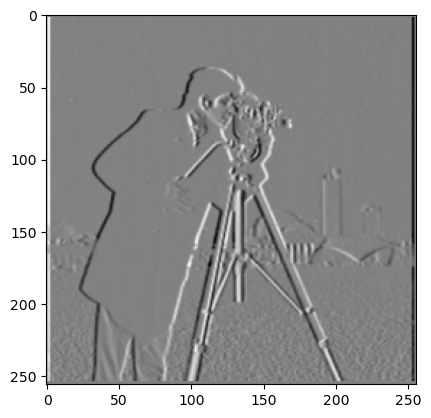

In [19]:
imgdx=deriveeH(IMG_CON)
plt.imshow(imgdx,cmap='gray')
plt.show()

In [20]:
def deriveeV(img):
    L,C= img.shape
    d_y=np.zeros((L,C),int)
    M = [-1,0,1]
    for i in range(1,L-1):
        for j in range(1,C-1):
             for n in range(-1,2):
                d_y[i][j]+=(img[i+n][j]*M[n+1])
    return d_y

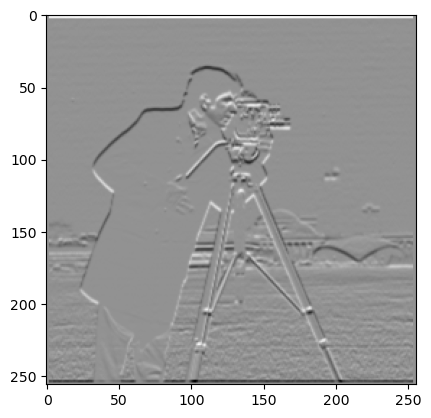

In [21]:
imgdy=deriveeV(IMG_CON)
plt.imshow(imgdy,cmap='gray')
plt.show()

In [22]:
def gradient(img):
    imgdy=deriveeV(IMG_CON)
    D1=np.array(imgdy)
    imgdy=deriveeH(IMG_CON)
    D2=np.array(imgdx)
    L,C= img.shape
    gradient=np.zeros((L,C),int)
    for i in range(L):
        for j in range(C):
            gradient[i][j]=sqrt(pow(D1[i][j],2)+pow(D2[i][j],2))
    return gradient

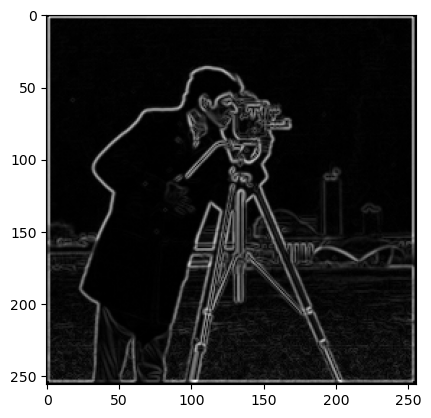

In [23]:
gradient=gradient(IMG_CON)
plt.imshow(gradient,cmap='gray')
plt.show()

In [24]:
def Orientation(img):
    imgdy=deriveeV(IMG_CON)
    D1=np.array(imgdy)
    imgdy=deriveeH(IMG_CON)
    D2=np.array(imgdx)
    L,C= img.shape
    ORIENTATION=np.zeros((L,C),int)
    for i in range(L):
        for j in range(C):
               ORIENTATION[i][j] = np.degrees(np.arctan2(D1[i][j],D2[i][j]))
    return ORIENTATION

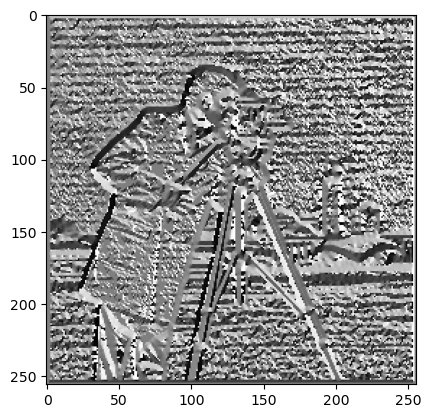

In [25]:
ORR=Orientation(IMG_CON)
plt.imshow(ORR,cmap='gray')
plt.show()

In [26]:
def eliminer_pixels_non_maximas(img,theta):
    width = img.shape[1]
    height = img.shape[0]
    newimg = np.zeros((width,height))
    theta[theta < 0] += 180
    for i in range(1,width-1):
        for j in range(1,height-1):
            try:
                q=255
                r=255
               #angle 0
                if (0 <= theta[i,j] < 22.5) or (157.5 <= theta[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= theta[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= theta[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= theta[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    newimg[i,j] = img[i,j]
                else:
                    newimg[i,j] = 0

            except IndexError as e:
                pass
    return newimg

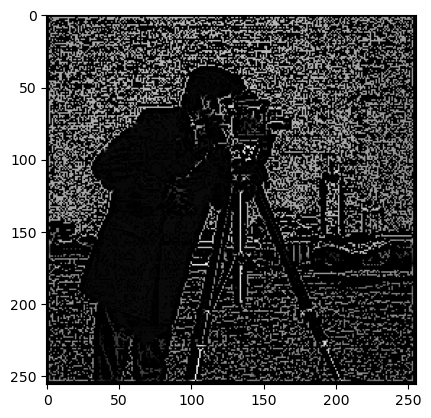

In [27]:
IMG_SNM=eliminer_pixels_non_maximas(IMG_CON,ORR)
plt.imshow(IMG_SNM,cmap='gray')
plt.show()

In [28]:
def seuillage_par_hysteresis(img):
    maxi = img.max() * 0.2
    mini = maxi * 0.05
   
    width = img.shape[0]
    height = img.shape[1]
    newimg = np.zeros((width,height))
   
    forti, fortj = np.where(img >= maxi)
    zeroi, zeroj = np.where(img < mini)
   
    faiblei, faiblej = np.where((img <= maxi) & (img >= mini))
   
    newimg[forti, fortj] = 255
    newimg[faiblei, faiblej] = 25
    for i in range(1, width-1):
         for j in range(1, height-1):
            if (newimg[i,j] == 25):
                try:
                    if ((newimg[i+1, j-1] == 255) or (newimg[i+1, j] == 255) or (newimg[i+1, j+1] == 255)
                        or (newimg[i, j-1] == 255) or (newimg[i, j+1] == 255)
                        or (newimg[i-1, j-1] == 255) or (newimg[i-1, j] == 255) or (newimg[i-1, j+1] == 255)):
                        newimg[i, j] = 255
                    else:
                        newimg[i, j] = 0
                except IndexError as e:
                    pass
    return newimg



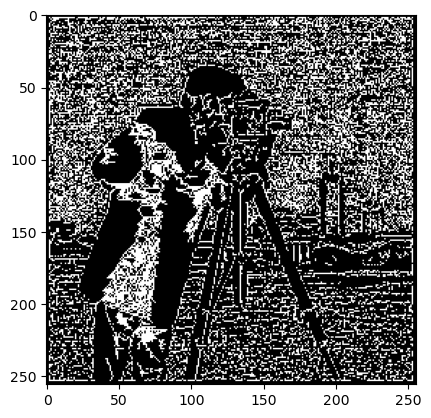

In [29]:
IMG_S=seuillage_par_hysteresis(IMG_SNM)
plt.imshow(IMG_S,cmap='gray')
plt.show()

In [32]:
#EXercice 3:

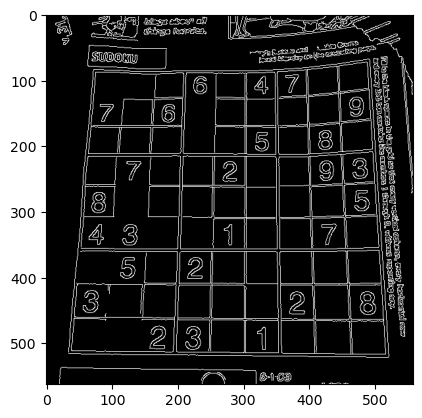

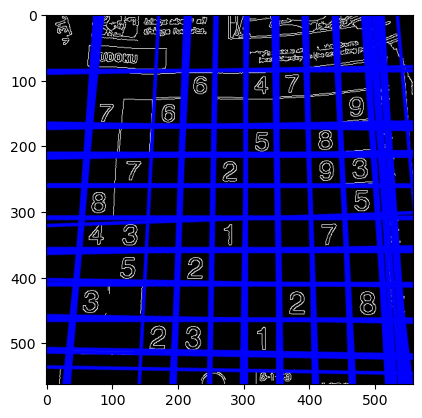

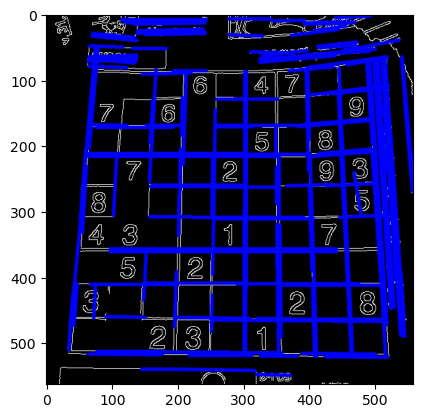

In [38]:
 # Loads an image
image = cv2.imread("imgEX3.png", cv2.IMREAD_GRAYSCALE)
# Check if image is loaded fine
output = cv2.Canny(image, 50, 200, None, 3)
    
# Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
    
lines = cv2.HoughLines(output, 1, np.pi / 180, 150, None, 0, 0)
    
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)
    
    
linesP = cv2.HoughLinesP(output, 1, np.pi / 180, 50, None, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
plt.imshow(output,cmap='gray')
plt.show()
plt.imshow(cdst,cmap='gray')
plt.show()
plt.imshow(cdstP,cmap='gray')
plt.show()


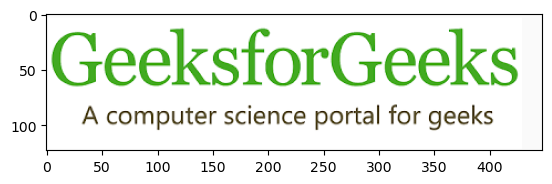

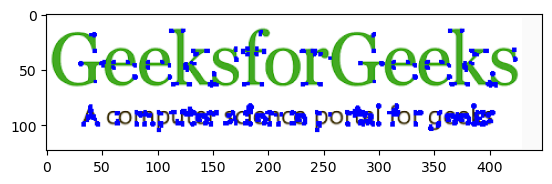

In [44]:
# Python program to illustrate
# corner detection with
# Harris Corner Detection Method
 
# organizing imports
import cv2
import numpy as np
 
# path to input image specified and
# image is loaded with imread command
image = cv2.imread('caman.tif')
plt.imshow(image,cmap='gray')
plt.show()
# convert the input image into
# grayscale color space
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# modify the data type
# setting to 32-bit floating point
operatedImage = np.float32(operatedImage)
 
# apply the cv2.cornerHarris method
# to detect the corners with appropriate
# values as input parameters
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07)
 
# Results are marked through the dilated corners
dest = cv2.dilate(dest, None)
 
# Reverting back to the original image,
# with optimal threshold value
image[dest > 0.01 * dest.max()]=[0, 0, 255]
# the window showing output image with corners
plt.imshow(image,cmap='gray')
plt.show()
# De-allocate any associated memory usage
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
